<a href="https://colab.research.google.com/github/vishruthakur/drug-target-interaction-prediction/blob/main/Drug_target_Interaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install DeepPurpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.3 MB/s eta 0:00:00
  Created wheel for DeepPurpose: filename=DeepPurpose-0.1.5-py3-none-any.whl s

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install pandas-flavor

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-eg1nxg0t
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-eg1nxg0t
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 18.4 MB/s eta 0:00:00
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1082894 sha256=1f4bb2c9e8a6b202f6f740bad702d07298e085edcef76da953b736302679ad4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kdlqifqc/wheels/b0/91/ea/7e8b56f17611c9bebc7f08065799bd317abd64f066463e2e8a
Successfully built descriptastorus


In [ ]:
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_drugs, X_targets, y = dataset.load_process_DAVIS(path = './data', binary = False, convert_to_log = True, threshold = 30)
print('Drug 1: ' + X_drugs[111])
print('Target 1: ' + X_targets[111])
print('Score 1: ' + str(y[111]))

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
Drug 1: CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N
Target 1: MLTRKPSAAAPAAYPTGRGGDSAVRQLQASPGLGAGATRSGVGTGPPSPIALPPLRASNAAAAAHTIGGSKHTMNDHLHVGSHAHGQIQVQQLFEDNSNKRTVLTTQPNGLTTVGKTGLPVVPERQLDSIHRRQGSSTSLKSMEGMGKVKATPMTPEQAMKQYMQKLTAFEHHEIFSYPEIYFLGLNAKKRQGMTGGPNNGGYDDDQGSYVQVPHDHVAYRYEVLKVIGKGSFGQVVKAYDHKVHQHVALKMVRNEKRFHRQAAEEIRILEHLRKQDKDNTMNVIHMLENFTFRNHICMTFELLSMNLYELIKKNKFQGFSLPLVRKFAHSILQCLDALHKNRIIHCDLKPENILLKQQGRSGIKVIDFGSSCYEHQRVYTYIQSRFYRAPEVILGARYGMPIDMWSLGCILAELLTGYPLLPGEDEGDQLACMIELLGMPSQKLLDASKRAKNFVSSKGYPRYCTVTTLSDGSVVLNGGRSRRGKLRGPPESREWGNALKGCDDPLFLDFLKQCLEWDPAVRMTPGQALRHPWLRRRLPKPPTGEKTSVKRITESTGAITSISKLPPPSSSASKLRTNLAQMTDANGNIQQRTVLPKLVS
Score 1: 7.200659450546418


In [ ]:
drug_encoding, target_encoding = 'MPNN', 'CNN'

In [ ]:
train, val, test = utils.data_process(X_drugs, X_targets, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1)
train.head(1)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."


In [ ]:
config = utils.generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

In [ ]:
model = models.model_initialize(**config)
model

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.2987. Total time 0.00055 hours
Training at Epoch 1 iteration 100 with loss 0.81675. Total time 0.00916 hours
Validation at Epoch 1 with loss:1.00206, MSE: 0.77444 , Pearson Correlation: 0.26288 with p-value: 1.06E-48 , Concordance Index: 0.63595
Training at Epoch 2 iteration 0 with loss 0.97026. Total time 0.01666 hours
Training at Epoch 2 iteration 100 with loss 0.49833. Total time 0.025 hours
Validation at Epoch 2 with loss:0.44490, MSE: 0.71699 , Pearson Correlation: 0.35608 with p-value: 1.46E-90 , Concordance Index: 0.68114
Training at Epoch 3 iteration 0 with loss 0.76264. Total time 0.0325 hours
Training at Epoch 3 iteration 100 with loss 0.66139. Total time 0.04055 hours
Validation at Epoch 3 with loss:0.77436, MSE: 0.76876 , Pearson Correlation: 0.37229 with p-value: 1.86E-99 , Concordance Index: 0.69908
Training at Epoch 4 iteration 0 with loss 0.56106. Total time 0.

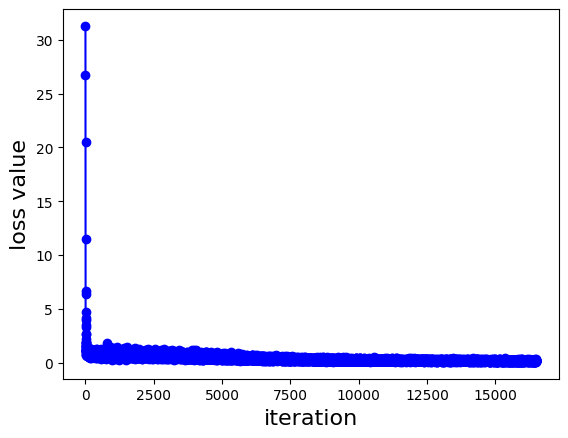

In [ ]:
model.train(train, val, test)

In [ ]:
X_drug = ['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N']
X_target = ['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL']
y = [7.365]
X_pred = utils.data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='no_split')
y_pred = model.predict(X_pred)
print('The predicted score is ' + str(y_pred))

Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
The predicted score is [6.117330074310303]


In [ ]:
t, t_name = dataset.load_SARS_CoV2_Protease_3CL()
print('Target Name: ' + t_name)
print('Amino Acid Sequence: '+ t)

Target Name: SARS-CoV2 3CL Protease
Amino Acid Sequence: SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTFQ


In [ ]:
r, r_name, r_pubchem_cid = dataset.load_antiviral_drugs()
print('Repurposing Drug 1 Name: ' + r_name[0])
print('Repurposing Drug 1 SMILES: ' + r[0])
print('Repurposing Drug 1 Pubchem CID: ' + str(r_pubchem_cid[0]))

Repurposing Drug 1 Name: Abacavir
Repurposing Drug 1 SMILES: C1CC1NC2=C3C(=NC(=N2)N)N(C=N3)C4CC(C=C4)CO
Repurposing Drug 1 Pubchem CID: 441300


In [ ]:

y_pred = models.repurpose(X_repurpose = r, target = t, model = model, drug_names = r_name, target_name = t_name,
                          result_folder = "./result/", convert_y = True)

repurposing...
Drug Target Interaction Prediction Mode...
in total: 82 drug-target pairs
encoding drug...
unique drugs: 81
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV2 3CL Protease
+------+----------------------+------------------------+---------------+
| Rank |      Drug Name       |      Target Name       | Binding Score |
+------+----------------------+------------------------+---------------+
|  1   |      Docosanol       | SARS-CoV2 3CL Protease |      0.04     |
|  2   |      Boceprevir      | SARS-CoV2 3CL Protease |      2.05     |
|  3   |     Glecaprevir      | SARS-CoV2 3CL Protease |     20.23     |
|  4   |   Podophyllotoxin    | SARS-CoV2 3CL Protease |     55.62     |
|  5   |     Methisazone      | SARS-CoV2 3CL Protease |     98.14     |
|  6   |    Fosamprenavir     | SARS-CoV2 3CL Protease |     137.06    |
|  7   |      Sofosbuvir      | SARS-CoV2 3CL Protease |     148.39    |
|  8   |     D

In [ ]:
t, d = dataset.load_IC50_1000_Samples()

Downloading...


In [ ]:
y_pred = models.virtual_screening(d, t, model)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 100 drug-target pairs
encoding drug...
unique drugs: 100
encoding protein...
unique target sequence: 91
Done.
predicting...
---------------
Virtual Screening Result
+------+-----------+-------------+---------------+
| Rank | Drug Name | Target Name | Binding Score |
+------+-----------+-------------+---------------+
|  1   |  Drug 55  |  Target 55  |      7.08     |
|  2   |  Drug 90  |  Target 90  |      6.84     |
|  3   |  Drug 49  |  Target 49  |      6.79     |
|  4   |  Drug 54  |  Target 54  |      6.52     |
|  5   |  Drug 21  |  Target 21  |      6.43     |
|  6   |  Drug 17  |  Target 17  |      6.25     |
|  7   |  Drug 45  |  Target 45  |      6.14     |
|  8   |  Drug 59  |  Target 59  |      5.99     |
|  9   |  Drug 15  |  Target 15  |      5.96     |
|  10  |  Drug 87  |  Target 87  |      5.80     |
checkout ./result/virtual_screening.txt for the whole list



In [ ]:
model.save_model('./final_model')

In [ ]:
model = models.model_pretrained(path_dir = './final_model')
model